# <span style='color:blue'> Data exploration </span>

In [13]:
# importing external libraries
import os
import json
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# increase resolution of graphs
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

In [2]:
df_questions_XIV = pd.read_csv('../data/legislature_XIV/df_questions.csv')
df_questions_XV = pd.read_csv('../data/legislature_XV/df_questions.csv')

df_actors_XIV = pd.read_csv('../data/legislature_XIV/df_actors.csv')
df_actors_XV = pd.read_csv('../data/legislature_XV/df_actors.csv')

questions_XIV = list(df_questions_XIV['q_text'])
questions_XV = list(df_questions_XV['q_text'])

df_questions_XIV.head(5)

,q_text,author_id,author_org,author_org_abrev,section,analysis_head,answer_min
0,mr jean-sébastien vialatte attire l' attention...,PA2907,Les Républicains,LES-REP,santé,remboursement,Affaires sociales et santé
1,mr hervé pellois attire l' attention de mr le ...,PA607595,"Socialiste, républicain et citoyen",SRC,élevage,bovins,"Agriculture, agroalimentaire et forêt"
2,mme anne grommerch attire l' attention de mr l...,PA343623,Union pour un Mouvement Populaire,UMP,entreprises,entreprises en difficulté,"Travail, emploi, formation professionnelle et ..."
3,mr thierry lazaro attire l' attention de mr le...,PA1857,Union pour un Mouvement Populaire,UMP,transports ferroviaires,SNCF,"Transports, mer et pêche"
4,mme virginie duby-muller appelle l' attention ...,PA608826,Union pour un Mouvement Populaire,UMP,télécommunications,Internet,"Économie, industrie et numérique"


#### *Distribution of sections by authors' gender*

We will first merge the 2 datasets (questions, actors) on `author_id` to plot the distribution of sections by gender

In [3]:
#result = pd.concat([df_questions_XIV, df_actors_XIV], axis=1, join="inner")
df_XIV_merged = pd.merge(df_questions_XIV, df_actors_XIV, left_on='author_id', right_on='author_id')
df_XV_merged = pd.merge(df_questions_XV, df_actors_XV, left_on='author_id', right_on='author_id')


# restrict to important columns
columns = ['q_text', 'author_id', 'civ', 'section', 'author_org', 'answer_min']
df_XIV_merged = df_XIV_merged[columns]
df_XV_merged = df_XV_merged[columns]


# ensure there are only 2 gender classes
print(df_XIV_merged['civ'].unique())
print(df_XV_merged['civ'].unique())

['M.' 'Mme']
['M.' 'Mme']


In [4]:
# dataframes by gender
df_XIV_male = df_XIV_merged.loc[df_XIV_merged['civ']=='M.']
df_XIV_female = df_XIV_merged.loc[df_XIV_merged['civ']=='Mme']

df_XV_male = df_XV_merged.loc[df_XV_merged['civ']=='M.']
df_XV_female = df_XV_merged.loc[df_XV_merged['civ']=='Mme']


**Number of males and females in each legislature**

In [5]:
nb_males_XIV = df_actors_XIV.loc[df_actors_XIV['civ']=='M.']['author_id'].nunique()
nb_females_XIV = df_actors_XIV.loc[df_actors_XIV['civ']=='Mme']['author_id'].nunique()

nb_males_XV = df_actors_XV.loc[df_actors_XV['civ']=='M.']['author_id'].nunique()
nb_females_XV = df_actors_XV.loc[df_actors_XV['civ']=='Mme']['author_id'].nunique()

print('14th legislature:\n----------------')
print('Number of males in the 14th leg. : ', nb_males_XIV, ' --> ', round(100* nb_males_XIV/(nb_males_XIV+nb_females_XIV), 3),'%')
print('Number of females in the 14th leg. : ', nb_females_XIV, ' --> ', round(100* nb_females_XIV/(nb_males_XIV+nb_females_XIV), 3),'%')


print('\n15th legislature:\n----------------')
print('Number of males in the 15th leg. : ', nb_males_XV, ' --> ', round(100* nb_males_XV/(nb_males_XV+nb_females_XV), 3),'%')
print('Number of females in the 15th leg. : ', nb_females_XV, ' --> ', round(100* nb_females_XV/(nb_males_XV+nb_females_XV), 3),'%')

14th legislature:
----------------
Number of males in the 14th leg. :  891  -->  71.739 %
Number of females in the 14th leg. :  351  -->  28.261 %

15th legislature:
----------------
Number of males in the 15th leg. :  778  -->  62.641 %
Number of females in the 15th leg. :  464  -->  37.359 %


**Number of male and female authors in each legislature**

In [6]:
nb_males_XIV = df_XIV_male['author_id'].nunique()
nb_females_XIV = df_XIV_female['author_id'].nunique()

nb_males_XV = df_XV_male['author_id'].nunique()
nb_females_XV = df_XV_female['author_id'].nunique()

print('14th legislature:\n----------------')
print('Number of male authors in the 14th leg. : ', nb_males_XIV, ' --> ', round(100* nb_males_XIV/(nb_males_XIV+nb_females_XIV), 3),'%')
print('Number of female authors in the 14th leg. : ', nb_females_XIV, ' --> ', round(100* nb_females_XIV/(nb_males_XIV+nb_females_XIV), 3),'%')


print('\n15th legislature:\n----------------')
print('Number of male authors in the 15th leg. : ', nb_males_XV, ' --> ', round(100* nb_males_XV/(nb_males_XV+nb_females_XV), 3),'%')
print('Number of female authors in the 15th leg. : ', nb_females_XV, ' --> ', round(100* nb_females_XV/(nb_males_XV+nb_females_XV), 3),'%')

14th legislature:
----------------
Number of male authors in the 14th leg. :  449  -->  72.536 %
Number of female authors in the 14th leg. :  170  -->  27.464 %

15th legislature:
----------------
Number of male authors in the 15th leg. :  378  -->  59.716 %
Number of female authors in the 15th leg. :  255  -->  40.284 %


**Number of questions by gender in each legislature**

In [7]:
nb_males_XIV = len(df_XIV_male)
nb_females_XIV = len(df_XIV_female)

nb_males_XV = len(df_XV_male)
nb_females_XV = len(df_XV_female)


print('14th legislature:\n-------------')
print('Number of questions by males in the 14th leg. : ', len(df_XIV_male), ' --> ', round(100* len(df_XIV_male)/(len(df_XIV_male)+len(df_XIV_female)), 3),'%')
print('Number of questions by females in the 14th leg. : ', len(df_XIV_female), ' --> ', round(100* len(df_XIV_female)/(len(df_XIV_male)+len(df_XIV_female)), 3),'%')


print('\n15th legislature:\n-------------')
print('Number of questions by males in the 15th leg. : ', len(df_XV_male), ' --> ', round(100* len(df_XV_male)/(len(df_XV_male)+len(df_XV_female)), 3),'%')
print('Number of questions by females in the 15th leg. : ', len(df_XV_female), ' --> ', round(100* len(df_XV_female)/(len(df_XV_male)+len(df_XV_female)), 3),'%')

14th legislature:
-------------
Number of questions by males in the 14th leg. :  81517  -->  78.275 %
Number of questions by females in the 14th leg. :  22625  -->  21.725 %

15th legislature:
-------------
Number of questions by males in the 15th leg. :  29261  -->  64.078 %
Number of questions by females in the 15th leg. :  16404  -->  35.922 %


**Distribution of sections by gender in the 14th legislature**

In [8]:
# number of sections in each legislature 
n_sections_XIV = df_XIV_merged['section'].nunique()
n_sections_XV = df_XV_merged['section'].nunique()

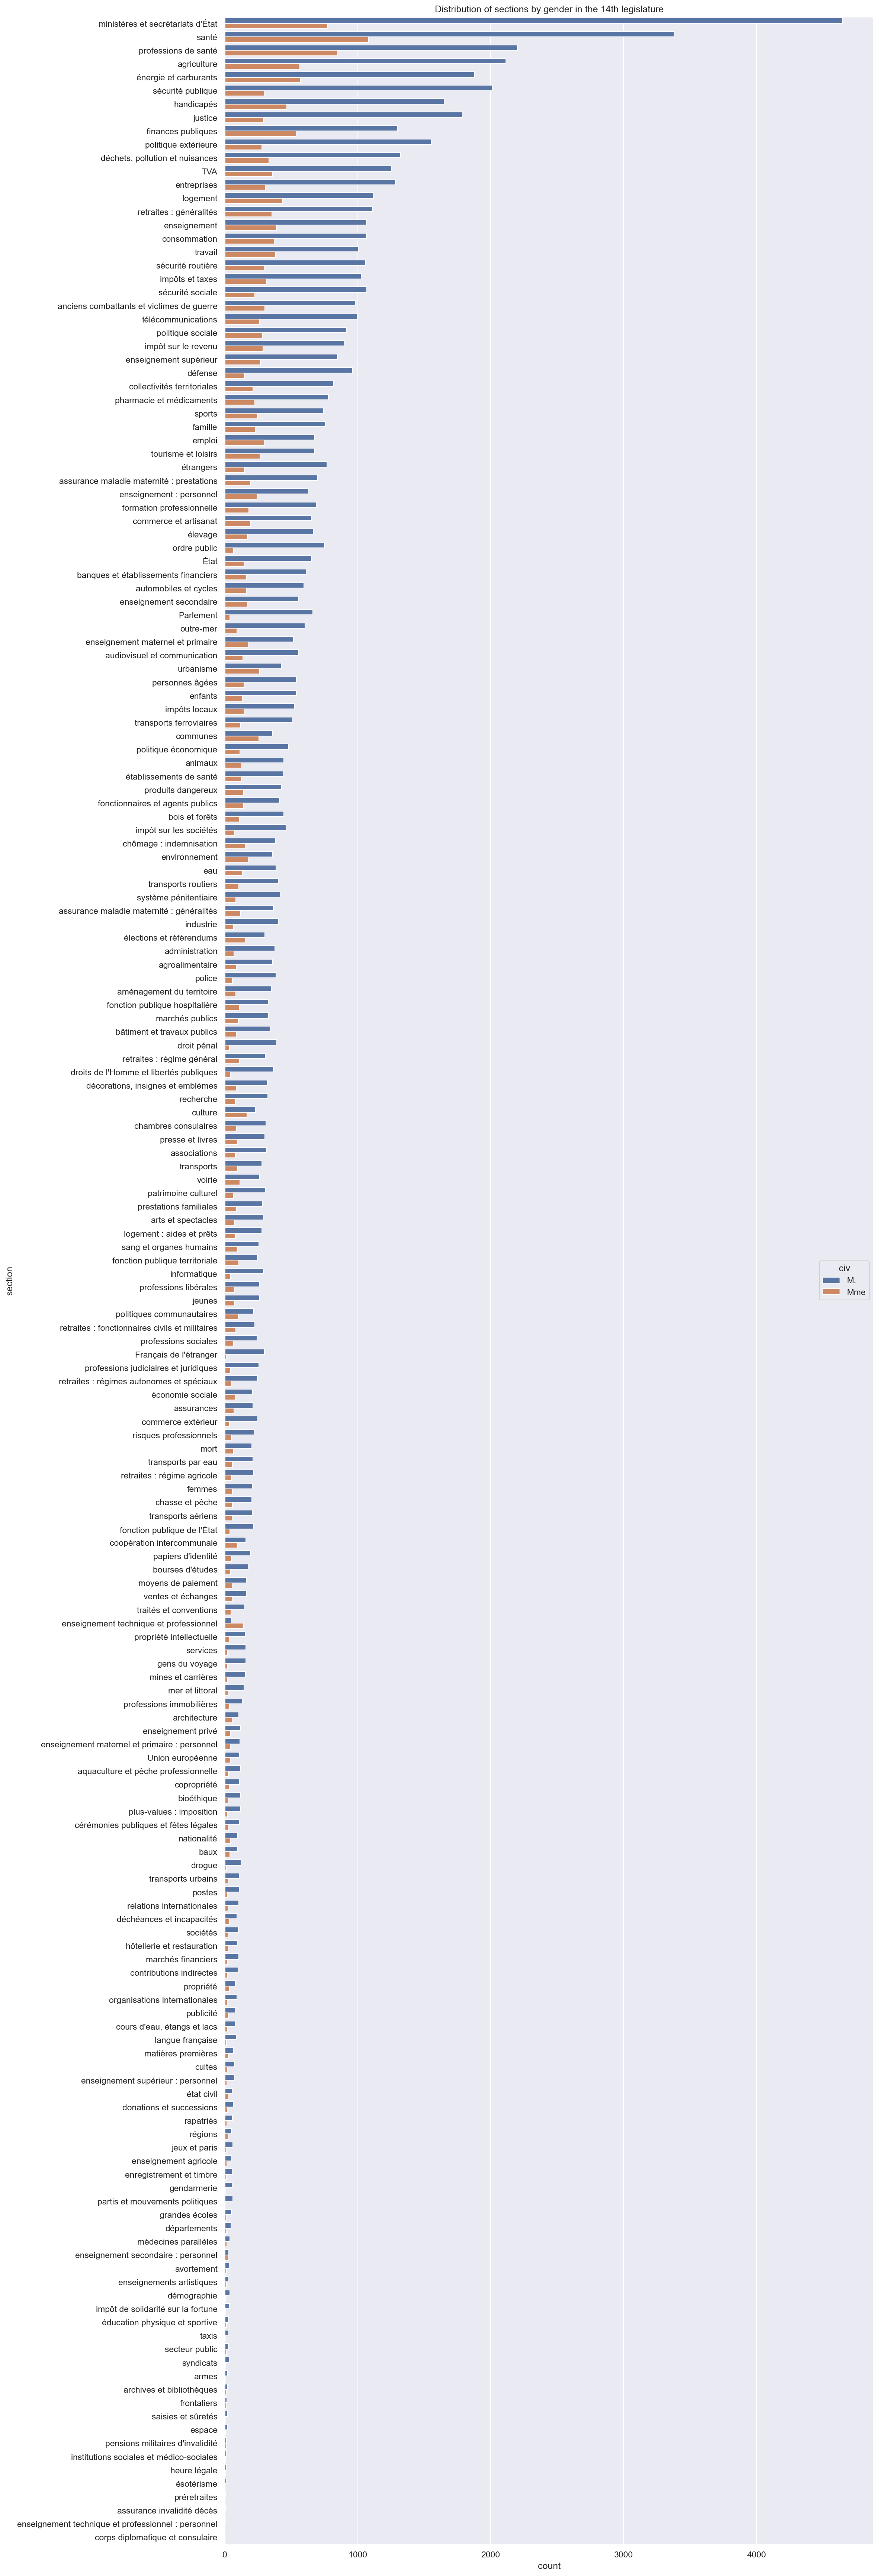

In [14]:
plt.figure(figsize=(15,60))
sns.countplot(data=df_XIV_merged, y='section', hue='civ', order=df_XIV_merged['section'].value_counts().index)
plt.title("Distribution of sections by gender in the 14th legislature")
plt.show()

**Distribution of sections by gender in the 15th legislature**

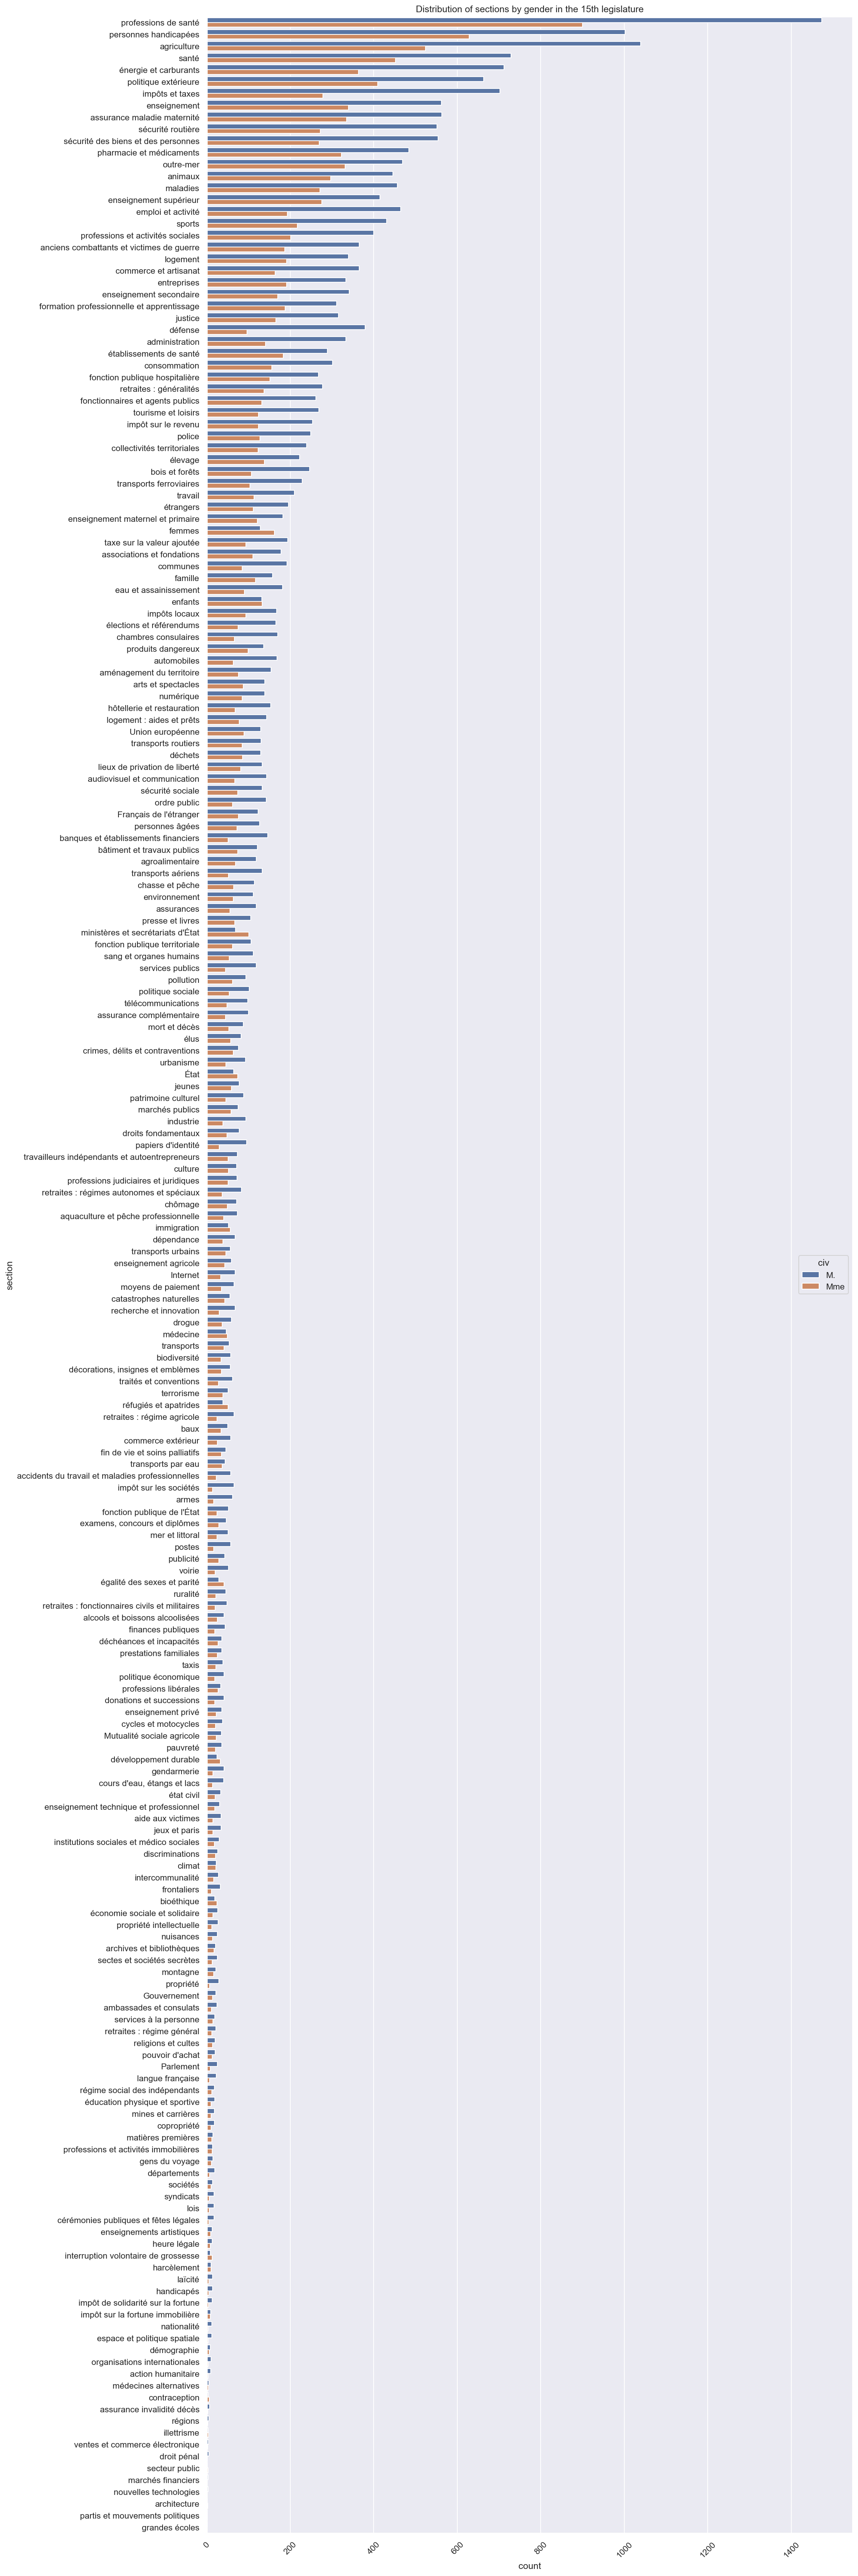

In [15]:
plt.figure(figsize=(15,60))
sns.countplot(data=df_XV_merged, y='section', hue='civ', order=df_XV_merged['section'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of sections by gender in the 15th legislature")
plt.show()

In [16]:
df_XIV_merged['section'].value_counts().index[0:df_XIV_merged['section'].nunique()]

Index(['ministères et secrétariats d'État', 'santé', 'professions de santé',
       'agriculture', 'énergie et carburants', 'sécurité publique',
       'handicapés', 'justice', 'finances publiques', 'politique extérieure',
       ...
       'saisies et sûretés', 'espace', 'pensions militaires d'invalidité',
       'institutions sociales et médico-sociales', 'heure légale',
       'ésotérisme', 'préretraites', 'assurance invalidité décès',
       'enseignement technique et professionnel : personnel',
       'corps diplomatique et consulaire'],
      dtype='object', length=188)

In [19]:
df_XIV_merged['section'].value_counts().index[0:10]

Index(['ministères et secrétariats d'État', 'santé', 'professions de santé',
       'agriculture', 'énergie et carburants', 'sécurité publique',
       'handicapés', 'justice', 'finances publiques', 'politique extérieure'],
      dtype='object')

In [20]:
df_XV_merged['section'].value_counts().index[0:10]

Index(['professions de santé', 'personnes handicapées', 'agriculture', 'santé',
       'énergie et carburants', 'politique extérieure', 'impôts et taxes',
       'enseignement', 'assurance maladie maternité', 'sécurité routière'],
      dtype='object')